In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [2]:
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For Train data set 
 male      0.647587
female    0.352413
Name: Sex, dtype: float64 

For Test data set 
 male      0.636364
female    0.363636
Name: Sex, dtype: float64


0

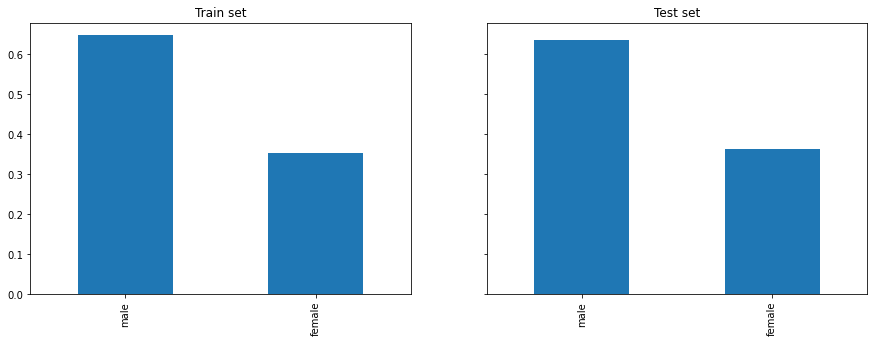

In [3]:
def comp_plot(col):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    data[col].value_counts(normalize=True).plot(kind='bar', figsize=(15,5), ax=ax1)
    ax1.set_title('Train set')
    test[col].value_counts(normalize=True).plot(kind='bar', figsize=(15,5), ax=ax2)
    ax2.set_title('Test set')
    print('For Train data set', '\n', data[col].value_counts(normalize='True'), '\n')
    print('For Test data set', '\n',test[col].value_counts(normalize='True'))
    
    return 0

comp_plot('Sex')

For Train data set 
 3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64 

For Test data set 
 3    0.521531
1    0.255981
2    0.222488
Name: Pclass, dtype: float64


0

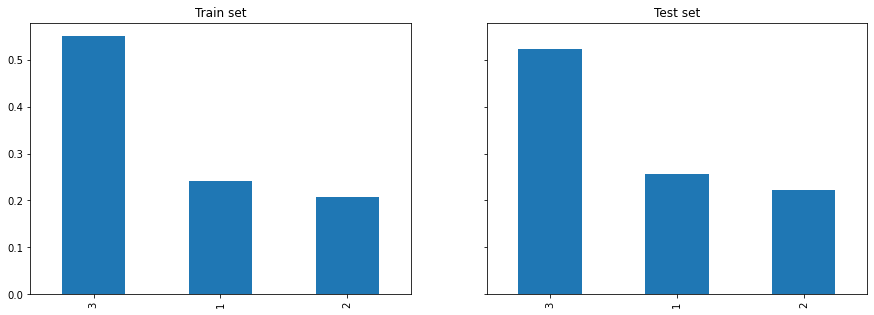

In [4]:
comp_plot('Pclass')

0    0.616162
1    0.383838
Name: Survived, dtype: float64


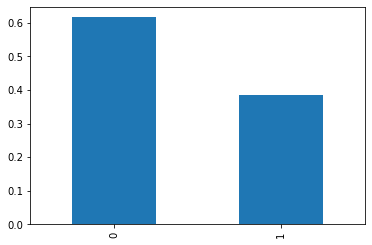

In [5]:
Sur = data.Survived.value_counts(normalize='True')
print(Sur)
data['Survived'].value_counts(normalize=True).plot(kind='bar')

#only 38% of people survived

Text(0.5, 1.0, 'Histogram of Age-Test set')

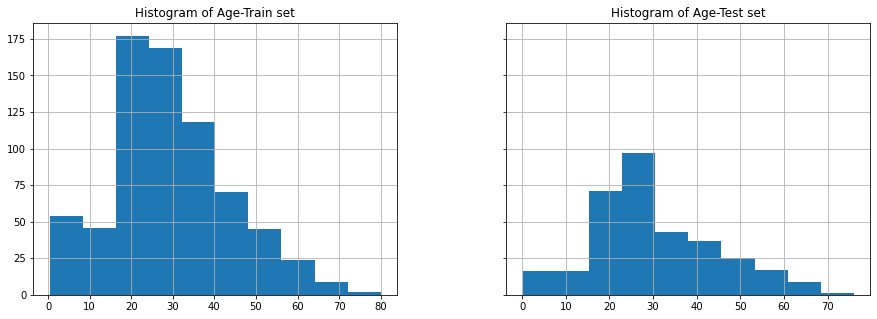

In [6]:
fig, (ax1, ax2)  = plt.subplots(1, 2, sharey=True, figsize=(15,5))
data.hist(column='Age', ax=ax1)
ax1.set_title('Histogram of Age-Train set')
test.hist(column='Age', ax=ax2)
ax2.set_title('Histogram of Age-Test set')

Text(0.5, 1.0, 'Histogram of Fare-Test set')

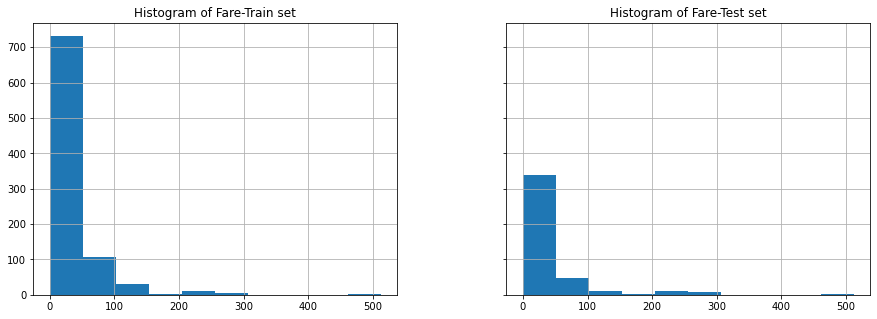

In [7]:
fig, (ax1, ax2)  = plt.subplots(1, 2, sharey=True, figsize=(15,5))
data.hist(column='Fare', ax=ax1)
ax1.set_title('Histogram of Fare-Train set')
test.hist(column='Fare', ax=ax2)
ax2.set_title('Histogram of Fare-Test set')

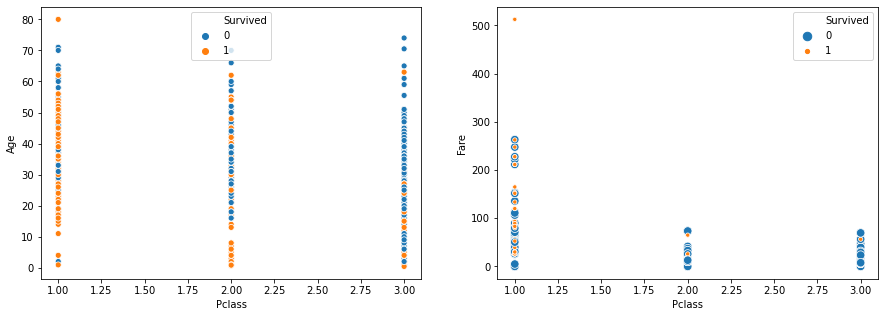

In [8]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x='Pclass', y='Age', hue='Survived', data=data, ax=ax1)
sns.scatterplot(x='Pclass', y='Fare', hue='Survived', size='Survived', data=data, ax=ax2)

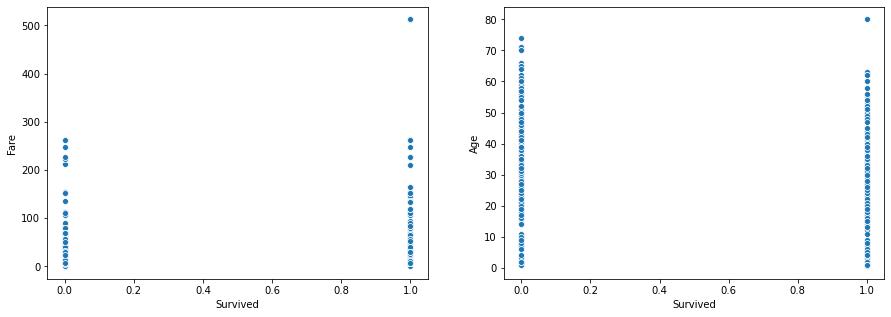

In [9]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(x='Survived', y='Fare', data=data, ax=ax1)
sns.scatterplot(x='Survived', y='Age', data=data, ax=ax2)

Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


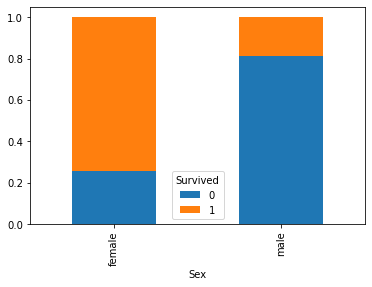

In [10]:
df_sur_gen = data.groupby(['Sex'])['Survived'].value_counts(normalize = 'True').unstack('Survived')
print(df_sur_gen)
df_sur_gen.plot(kind='bar', stacked=True)

Survived         0         1
Pclass                      
1         0.370370  0.629630
2         0.527174  0.472826
3         0.757637  0.242363


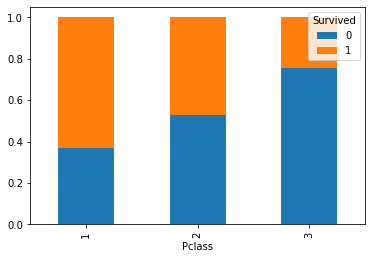

In [11]:
df_class = data.groupby(['Pclass'])['Survived'].value_counts(normalize=True).unstack('Survived')
print(df_class)
df_class.plot(kind='bar', stacked=True)
# 62% of class 1 people survived
# 47% of class 2 people survived
# 24% of class 3 people survived

In [12]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
mean_age = data.groupby(['Sex','Pclass'])['Age'].mean()
mean_age.reset_index(name = 'm_Age')

,Sex,Pclass,m_Age
0,female,1,34.611765
1,female,2,28.722973
2,female,3,21.750000
3,male,1,41.281386
4,male,2,30.740707
5,male,3,26.507589


In [15]:
def fill_Ages(row):
    if pd.isnull(row['Age']):
        return mean_age[row['Sex'],row['Pclass']]
    else:
        return row['Age']

data['Age'] =data.apply(fill_Ages, axis=1)

In [16]:
mean_age = test.groupby(['Sex','Pclass'])['Age'].mean()
mean_age.reset_index(name = 'm_Age')

test['Age'] =test.apply(fill_Ages, axis=1)

test.Fare.fillna(test.Fare.mean(),inplace=True)

In [17]:
data.Cabin.fillna('Unknown', inplace=True)
test.Cabin.fillna('Unknown', inplace=True)

In [18]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
data.Embarked.fillna('S', inplace=True)

In [20]:
data['Title'] = data.Name.str.extract(r',\s*([^\.]*)\s*\.',expand=False)

test['Title'] = test.Name.str.extract(r',\s*([^\.]*)\s*\.',expand=False)

data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Capt              1
Sir               1
Ms                1
Jonkheer          1
the Countess      1
Lady              1
Mme               1
Don               1
Name: Title, dtype: int64

In [21]:
# noble - 1
# Mrs - 2
# Miss - 3
# Mr - 4
# Workers - 5

title_map = {'Lady':1, 'Master':1, 'the Countess':1, 'Jonkheer':1, 'Sir':1, 'Don':1, 'Dr':1,
             'Mrs':2, 'Mme':2, 'Miss':3, 'Mlle':3, 'Ms':3,
             'Mr':4, 'Capt': 5, 'Col':5, 'Major':5, 'Rev':5 }

data.Title = data.Title.map(title_map)

test.Title = test.Title.map(title_map)

data.drop('Name', axis=1, inplace=True) 
test.drop('Name', axis=1, inplace=True)

In [22]:
# less than 50 - 1
# less than 100 - 2
# less than 150 - 3
# else - 3

def Fare_group(fare):
    a = 0
    if (fare <= 50):
        a = 1
    
    elif (fare <= 100):
        a = 2
    
    elif (fare <=150):
        a = 3
        
    else:
        a = 4

    return a


data['Fare Group'] = data.Fare.map(Fare_group)
#data.drop('Fare', axis=1, inplace=True)

test['Fare Group'] = test.Fare.map(Fare_group)  
#test.drop('Fare', axis=1, inplace=True)

In [23]:
# below 10 - 1
# below 20 - 2
# below 40 - 3
# below 80 - 4

def Age_group(age):
    a = 0
    if (age <= 10):
        a = 1 
    
    elif (age <= 20):
        a = 2
    
    elif (age <=40):
        a = 3
        
    else:
        a = 4

    return a

data['Age Group'] = data.Age.map(Age_group)
#data.drop('Age', axis=1, inplace=True)

test['Age Group'] = test.Age.map(Age_group)  
#test.drop('Age', axis=1, inplace=True)

In [24]:
data['Sex'] = data.Sex.apply(lambda x:1 if x=='female' else 2)   #converting column Sex into int format
test['Sex'] = test.Sex.apply(lambda x:1 if x=='female' else 2)

In [25]:
# S - 1
# C - 2
# Q - 3

data['Embarked'] = data.Embarked.apply(lambda x:1 if x=='S' else (2 if x=='C' else 3))
test['Embarked'] = test.Embarked.apply(lambda x:1 if x=='S' else (2 if x=='C' else 3))

In [26]:
data['No_fam_mem'] = data['SibSp'] + data['Parch']
data.drop(['SibSp','Parch', 'Ticket'], axis=1, inplace=True)

test['No_fam_mem'] = test['SibSp'] + test['Parch']
test.drop(['SibSp','Parch', 'Ticket'], axis=1, inplace=True)

In [27]:
data.No_fam_mem.value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: No_fam_mem, dtype: int64

In [28]:
# travelling alone - 1
# small fam - 2
# large fam - 3
def fam_type(fam_size):
    a = 0
    if (fam_size==0):
        a = 1
    
    elif (fam_size<= 5):
        a = 2
    
    else:
        a = 3

    return a

data['Fam size'] = data.No_fam_mem.map(fam_type)

data.drop('No_fam_mem', axis=1, inplace=True)

data = data[['PassengerId', 'Pclass', 'Title', 'Sex', 'Age', 'Age Group', 'Fam size', 'Fare', 'Fare Group', 'Embarked', 'Cabin', 'Survived']]



test['Fam size'] = test.No_fam_mem.map(fam_type)

test.drop('No_fam_mem', axis=1, inplace=True)

test = test[['PassengerId', 'Pclass', 'Title', 'Sex', 'Age', 'Age Group', 'Fam size', 'Fare', 'Fare Group', 'Embarked', 'Cabin']]

In [29]:
data.Cabin.value_counts()         #letter of cabin represent the deck

Unknown        687
B96 B98          4
C23 C25 C27      4
G6               4
D                3
              ... 
D46              1
A6               1
C47              1
A5               1
E50              1
Name: Cabin, Length: 148, dtype: int64

In [30]:
data.Cabin = data.Cabin.map(lambda x: x[0])
test.Cabin = test.Cabin.map(lambda x: x[0])

data.Cabin.value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [31]:
# Unknown-1, A-2, B-3, C-4, D-5, E-6, F-7, G-8, T-9

deck_map = {'U':1, 'A':2, 'B':3, 'C':4, 'D':5, 'E':6, 'F':7, 'G':8, 'T':9}

data['Deck'] = data['Cabin']
data.Deck = data.Deck.map(deck_map)

data.drop('Cabin', axis=1, inplace=True)

test['Deck'] = test['Cabin']
test.Deck = test.Deck.map(deck_map)

test.drop('Cabin', axis=1, inplace=True)

In [32]:
data.isnull().sum()

PassengerId    0
Pclass         0
Title          0
Sex            0
Age            0
Age Group      0
Fam size       0
Fare           0
Fare Group     0
Embarked       0
Survived       0
Deck           0
dtype: int64

In [33]:
test.isnull().sum()

PassengerId    0
Pclass         0
Title          1
Sex            0
Age            0
Age Group      0
Fam size       0
Fare           0
Fare Group     0
Embarked       0
Deck           0
dtype: int64

In [34]:
test.Title.fillna(3, inplace=True)

In [35]:
data['class_age'] = data['Pclass']*data['Age']

data['class_title'] = data['Pclass']*data['Title']
data['class_gen'] = data['Pclass']*data['Sex']

data['fam_fare'] = data['Fam size']*data['Fare']

data['em_fare'] = data['Embarked']*data['Fare']

data['title_age'] = data['Title']*data['Age']


test['class_age'] = test['Pclass']*test['Age']

test['class_title'] = test['Pclass']*test['Title']
test['class_gen'] = test['Pclass']*test['Sex']

test['fam_fare'] = test['Fam size']*test['Fare']

test['em_fare'] = test['Embarked']*test['Fare']

test['title_age'] = test['Title']*test['Age']

In [36]:
data.head()

,PassengerId,Pclass,Title,Sex,Age,Age Group,Fam size,Fare,Fare Group,Embarked,Survived,Deck,class_age,class_title,class_gen,fam_fare,em_fare,title_age
0,1,3,4,2,22.0,3,2,7.2500,1,1,0,1,66.0,12,6,14.5000,7.2500,88.0
1,2,1,2,1,38.0,3,2,71.2833,2,2,1,4,38.0,2,1,142.5666,142.5666,76.0
2,3,3,3,1,26.0,3,1,7.9250,1,1,1,1,78.0,9,3,7.9250,7.9250,78.0
3,4,1,2,1,35.0,3,2,53.1000,2,1,1,4,35.0,2,1,106.2000,53.1000,70.0
4,5,3,4,2,35.0,3,1,8.0500,1,1,0,1,105.0,12,6,8.0500,8.0500,140.0


In [37]:
data.drop(['Age', 'Fare'], axis=1, inplace=True)
test.drop(['Age', 'Fare'], axis=1, inplace=True)

In [38]:
cols = data.columns.tolist()
print(cols)

['PassengerId', 'Pclass', 'Title', 'Sex', 'Age Group', 'Fam size', 'Fare Group', 'Embarked', 'Survived', 'Deck', 'class_age', 'class_title', 'class_gen', 'fam_fare', 'em_fare', 'title_age']


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col_lst = [ 'Pclass', 'Title', 'Age Group', 'Fam size', 'Fare Group', 'Embarked',
           'Deck', 'class_age', 'class_title', 'class_gen', 'fam_fare', 'em_fare', 'title_age']

data[col_lst] = scaler.fit_transform(data[col_lst])
test[col_lst] = scaler.fit_transform(test[col_lst])

In [40]:
data = data[['Pclass', 'Title', 'Sex', 'Age Group', 'Fam size', 'Fare Group', 'Embarked', 'Deck', 'class_age', 
             'class_title', 'class_gen', 'fam_fare', 'em_fare', 'title_age', 'Survived']]

test = test[['PassengerId', 'Pclass', 'Title', 'Sex', 'Age Group', 'Fam size', 'Fare Group', 'Embarked', 'Deck', 'class_age', 
             'class_title', 'class_gen', 'fam_fare', 'em_fare', 'title_age']]

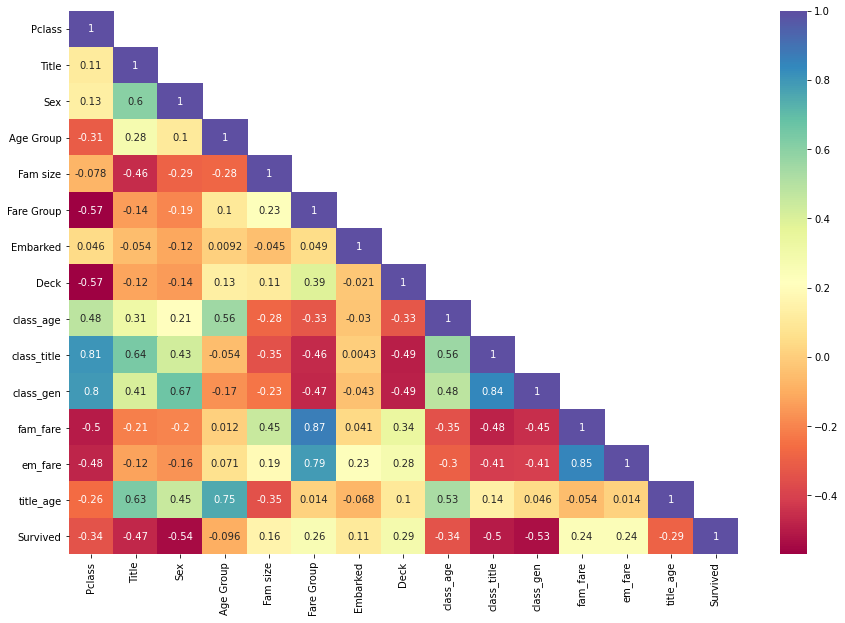

In [41]:
corr_mat = data.corr()
np.tril(np.ones(corr_mat.shape)).astype(np.bool)[0:5,0:5]
df_lt = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
plt.subplots(figsize=(15,10))
sns.heatmap(df_lt, annot=True, cmap="Spectral", fmt='.2g')

# ************************************

In [42]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score
#GridSearchCV - for selecting the best hyperparameter
#StratifiedKFold  - divide categories in a uniform way
from sklearn.metrics import accuracy_score

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)  #StratifiedKFold

#data_1 = data.drop('PassengerId', axis=1).copy()
test_2 = test.drop('PassengerId', axis=1).copy()

target = data['Survived']
train = data.drop('Survived', axis=1)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=1)   #Split the train data set
#train_test_split(X, Y, test_size, random_state)
# X,Y - dataset we are going to use for splitiing
#test_size - define the size of the test set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 14), (268, 14), (623,), (268,))

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
#model.fit() is used to train the model on data
#if y_test is the real labels for X_test, model.score(X_test, y_test)  compare predictions of the model against the real labels
#model.score(X_train, y_train) measure the accuracy of the model against training data.This has nothing to do with test data
#model.predict(X_test) predict labels for test set 
#model.score(X_test, y_test) and model.predict(X_test), accuracy_score(y_test, prediction) are both same

In [46]:
def model_score(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)*100
    
    return model_score

In [47]:
def cv_score(model):
    cv_score = cross_val_score(model, train, target, cv=kf, scoring='accuracy')
    return cv_score.mean()*100

In [48]:

print('Cross val score for LR  : ', cv_score(LogisticRegression()))
print('LR Score : ', model_score(LogisticRegression()),'\n')

print('Cross val score for RF  : ', cv_score(RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, 
                                                    min_samples_leaf=6, max_features='auto', random_state=1)))
print('RF Score : ', model_score(RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=6, min_samples_leaf=6, 
                                    max_features='auto', random_state=1)), '\n')

print('Cross val score for SVC : ', cv_score(SVC(C=30)))
print('SVC Score : ', model_score(SVC(C=30)), '\n')

print('Cross val score for KNN : ', cv_score(KNeighborsClassifier(n_neighbors=50)))
print('KNN Score : ', model_score(KNeighborsClassifier(n_neighbors=50)), '\n')

print('Cross val score for DT  : ', cv_score(DecisionTreeClassifier(max_depth=12, min_samples_split=2, random_state=1)))
print('DT Score : ', model_score(DecisionTreeClassifier(max_depth=12, min_samples_split=2, random_state=1)), '\n')

#Cross val score for LR  :  81.48189762796505
#LR Score :  77.98507462686567 

#Cross val score for RF  :  83.2808988764045
#RF Score :  77.61194029850746 

#Cross val score for SVC :  81.82272159800249
#SVC Score :  77.98507462686567 

#Cross val score for KNN :  80.13732833957553
#KNN Score :  75.74626865671642 

#Cross val score for DT  :  82.61173533083645
#DT Score :  79.1044776119403

Cross val score for LR  :  81.37203495630463
LR Score :  77.61194029850746 

Cross val score for RF  :  82.71785268414482
RF Score :  77.61194029850746 

Cross val score for SVC :  81.93258426966293
SVC Score :  75.74626865671642 

Cross val score for KNN :  81.14856429463171
KNN Score :  75.3731343283582 

Cross val score for DT  :  78.7952559300874
DT Score :  78.73134328358209 



In [49]:
from xgboost import XGBClassifier, plot_importance

xgbc = XGBClassifier(max_depth=15, min_child_weight=1, n_estimators=500, random_state=42, learning_rate=0.01,  
                     eval_metric=["error", "logloss"])
xgbc.fit(X_train,y_train, early_stopping_rounds=15, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)   
# verbose=True print val_error and logloss for each iteration

[0]	validation_0-error:0.10433	validation_0-logloss:0.68697	validation_1-error:0.22388	validation_1-logloss:0.68884
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.10433	validation_0-logloss:0.68093	validation_1-error:0.22388	validation_1-logloss:0.68465
[2]	validation_0-error:0.10433	validation_0-logloss:0.67501	validation_1-error:0.22388	validation_1-logloss:0.68054
[3]	validation_0-error:0.10433	validation_0-logloss:0.66919	validation_1-error:0.22388	validation_1-logloss:0.67650
[4]	validation_0-error:0.10433	validation_0-logloss:0.66348	validation_1-error:0.22388	validation_1-logloss:0.67258
[5]	validation_0-error:0.10433	validation_0-logloss:0.65787	validation_1-error:0.22015	validation_1-logloss:0.66871
[6]	validation_0-error:0.10433	validation_0-logloss:0.65237	validation_1-error:0.22015	validation_1-logloss:0.66493
[7]	validation_0-error:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1,
              eval_metric=['error', 'logloss'], gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
y_pred_xgbc = xgbc.predict(X_test)

In [51]:
xgbc_score_train = xgbc.score(X_train, y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)    # or print(xgbc.score(X_test, y_test)*100)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 91.97431781701445
Test Prediction Score 78.73134328358209


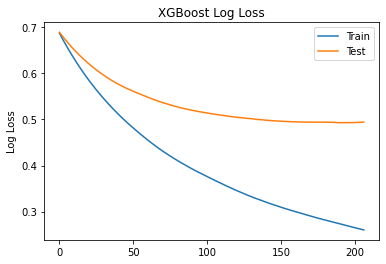

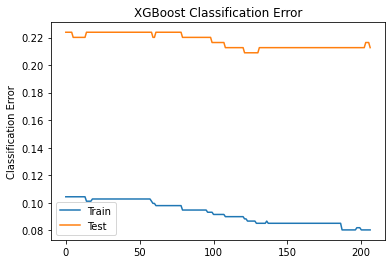

In [52]:
results = xgbc.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()

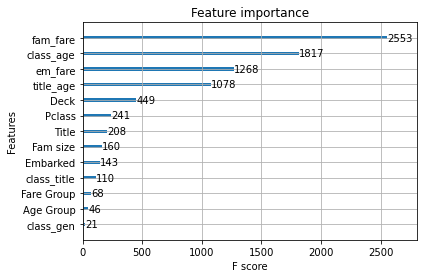

In [53]:
plot_importance(xgbc)
plt.show()

In [54]:
xgbc.fit(train, target)

prediction_xgbc = xgbc.predict(test_2)

In [55]:
model=RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2,min_samples_leaf=6, max_features='auto', random_state=1)
model.fit(train, target)

pred_dt = model.predict(test_2)

In [56]:
model = SVC( C=20)
model.fit(train, target)

pred_svc = model.predict(test_2)

In [57]:
sub = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived':pred_svc})
sub.to_csv('sample_submission.csv', index=False)